#### Name: Sutton Ursillo

# PHYS 230 Lab Assignment 5

### Wednesday, February 4, 2026: Chapter 3.3-3.4
- Density plots
- 2D graphics

#### Start by importing any packages you need below (feel free to update as you go):

In [2]:
from qdraw import window, circle, square,rectangle, show, draw
import numpy as np
import matplotlib.pyplot as plt
import math

## Catch the errors! (15 pts - 5 pts each)

For each of the following cells, find the error (or errors), and correct it (or them) by:<br> 
    a. add a new markdown cell that describes what was wrong with the code,<br>
    b. creating a new code cell with the corrected code (where possible)<br>
<br>
**Make sure to write in complete sentences; corrected code with a poorly written explanation will not receive better than 4 of 5 points on a given question.** I am not looking for a lengthy explanation; but one that is sufficiently detailed to explain the errors. 

In [2]:
#1 - create a 50 x 100 array of random numbers between 0 and 1 and make a density plot with the origin at the lower left corner
my array = np.random.rand(50,100)
plt.imshow(myarray, origin=lower)

SyntaxError: invalid syntax (3606213124.py, line 2)

in the first line 'my array' should be 'myarray' without a space. Also if you want 50 x values and 100 y values it should be (100,50). finally lower need to be in "".

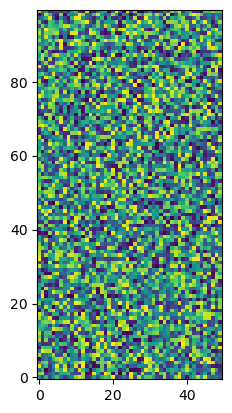

In [2]:
myarray = np.random.rand(100,50)
plt.imshow(myarray, origin="lower")



TypeError: Invalid shape (50,) for image data

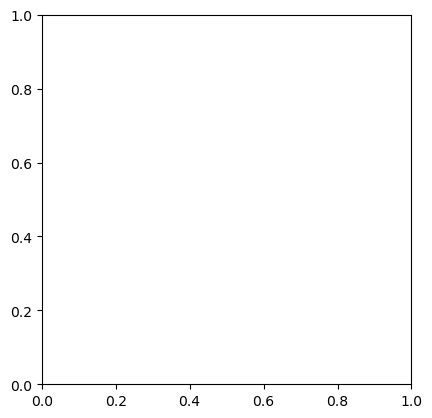

In [ ]:
#2 - create a 2D array out of x and y and plot a density plot out of it 
x = np.linspace(1,10)
y = np.linspace(10,1)
height = x*y
plt.imshow(height)

the arrays needed to be fixed by add a 100 at the end so it knows what to count by. It also did not like multiplying the x and y. So I had to tell it what specific parts of x and y I want it to compute. 

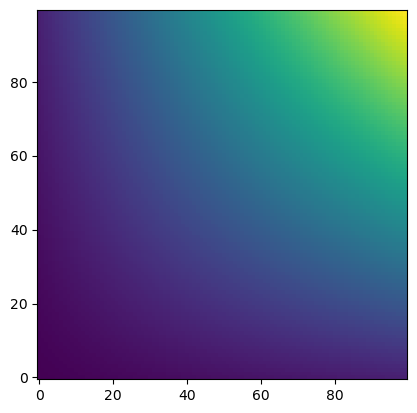

In [3]:
x = (np.linspace(1,10,100))
y = (np.linspace(1,10,100))
height = x[None,:]*y[:,None]
plt.imshow(height, origin = "lower")


In [ ]:
#3 - make a 2D graphic of a circle centered on a,b = 0,0
circle(pos=(a,b), size=1)

a and b are not defined and the window is not defined 

In [4]:
window(xlim=[-1,1],ylim=[-1,1])
a, b = 0, 0

circle(pos=(a,b), size=1)
draw()



## Short python snippets (10 pts - 5 pts each)
Below each markdow cell, write a short python snippet to perform the indicated action; you will likely have to use google to find out how to perform some of these actions--this is deliberate on my part. Google and *stack overflow* are your friends.<br>
Add a markdown cell to explain your thinking if this is needed.

1. Create a 2D array of random numbers (of your choice) and plot them as a density plot with the origin in the lower left corner. Change the color scheme to some sort of rainbow. 

<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | ColorizingArtist | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

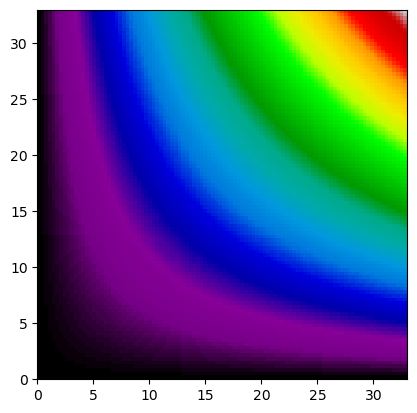

In [5]:
x = np.linspace(0,33,100)
y = np.linspace(0,33,100)
density_plot = x[None,:]*y[:,None]
plt.imshow(density_plot, origin = "lower",extent = [x.min(), x.max(), y.min(), y.max()], cmap="nipy_spectral")
plt.colorbar



2. In a window with a background color of your choice (not white), create a rectangle at the center with 2 circles in different locations around the window. Make the circles your favorite colors (of those available). 

In [3]:
window(xlim=[-7,7],ylim=[-7,7], bgcolor="b")
rectangle(left=1,right=1,bottom=4,top=4,color="black")
circle(pos=[-4,3], size = 2,color="m")
circle(pos=[4,-3],size=2,color="orange")
draw()

### Write a script 1 
#### Making a density plot of a function

Write a code to do the following: 
- Create a 2D array that shows how the values change linearly from the center outwards based on the equation: 
$$ B = 7.5r - 2.8 $$
    - the overall grid should be 200 x 200 units 
    - you should use a 1000x1000 array
- Plot the array as a density plot, change the color scale to one of your choice, and include a color bar

When your program is complete, add a markdown cell below it to explain your process and program. 

### Write a script 2
#### Making 2D objects - making a slice of pizza

Write a code to do the following: 
- Create a window that is 4 x 4
- Make a slice of pepperoni using the following objects:
    - A polygon (triangle) for the slice
    - A rectangle for the crust
    - Circles for the slices of pepperoni
- Make the background white and remember the cheese is yellow!

When your program is complete, add a markdown cell below it to explain your process and program. 